In [37]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv("../data/data_latinoamerica.csv")

In [39]:
df = df[df['location_key'] == 'PE']

In [40]:
df.head()

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
10252886,PE,2020-01-01,PE,Peru,0.00,0.00,0.00,0.00,NaN,29381884.00,...,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60,NaN,NaN
10252887,PE,2020-01-02,PE,Peru,0.00,0.00,0.00,0.00,NaN,29381884.00,...,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60,NaN,NaN
10252888,PE,2020-01-03,PE,Peru,0.00,0.00,0.00,0.00,NaN,29381884.00,...,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60,NaN,NaN
10252889,PE,2020-01-04,PE,Peru,0.00,0.00,0.00,0.00,NaN,29381884.00,...,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60,NaN,NaN
10252890,PE,2020-01-05,PE,Peru,0.00,0.00,0.00,0.00,NaN,29381884.00,...,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60,NaN,NaN


### Contar cuantos valores Nulos tiene cada columna

In [41]:
# Contar cuántas filas contienen valores nulos en cada columna
null_counts = df.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
columns_with_nulls = null_counts[null_counts > 0]

# Mostrar el recuento de filas con valores nulos por columna
print("Columns with null values and their counts:")
print(columns_with_nulls)

Columns with null values and their counts:
new_confirmed                              4
new_deceased                               4
cumulative_confirmed                       4
cumulative_deceased                        4
cumulative_vaccine_doses_administered    410
average_temperature_celsius                9
minimum_temperature_celsius                9
maximum_temperature_celsius                9
rainfall_mm                               14
relative_humidity                          9
new_recovered                            991
cumulative_recovered                     991
dtype: int64


### Contar cuantos 0 tiene cada columna

In [42]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df.columns[(df == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 69 rows with zero values.
Column 'new_deceased' has 73 rows with zero values.
Column 'cumulative_confirmed' has 64 rows with zero values.
Column 'cumulative_deceased' has 62 rows with zero values.
Column 'rainfall_mm' has 593 rows with zero values.

Counts of zero values per column: {'new_confirmed': 69, 'new_deceased': 73, 'cumulative_confirmed': 64, 'cumulative_deceased': 62, 'rainfall_mm': 593}


# Transformacion de DF

#### Realizo un filtrado debido que anterior y posterior a estas fechas hay valores nulos y/o datos errones

In [43]:
# Definir el rango de fechas
start_date = '2020-01-01'
end_date = '2022-08-31'

# Filtrar el DataFrame para mantener las filas dentro del rango de fechas
df_pe= df[(df['date'] >= start_date) & (df['date'] <= end_date)]

#### Elimino estas columnas por: 
#### las 2 primeras columnas tienen valores errones
#### la 3ra columna tiene muchos valores en 0
#### la 4 y 5ta columna tienen puros valores nulos
#### la 6 y 7ma columna no concuerdan con el de poblacion 
#### Prefiero trabajar con el promedio de la temperatura del dia

In [44]:
columns_to_drop = [
    'cumulative_confirmed', 
    'cumulative_deceased', 
    'rainfall_mm', 
    'new_recovered',
    'cumulative_recovered',
    'population_rural',
    'population_urban', 
    'minimum_temperature_celsius', 
    'maximum_temperature_celsius'
]

# Eliminar las columnas
df_pe = df_pe.copy()
df_pe.drop(columns=columns_to_drop, inplace=True)

In [45]:
df_pe.head()

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
10252886,PE,2020-01-01,PE,Peru,0.00,0.00,NaN,29381884.00,14450757.00,14931127.00,...,23.37,77.49,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10252887,PE,2020-01-02,PE,Peru,0.00,0.00,NaN,29381884.00,14450757.00,14931127.00,...,22.89,79.09,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10252888,PE,2020-01-03,PE,Peru,0.00,0.00,NaN,29381884.00,14450757.00,14931127.00,...,24.18,72.81,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10252889,PE,2020-01-04,PE,Peru,0.00,0.00,NaN,29381884.00,14450757.00,14931127.00,...,24.81,74.27,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10252890,PE,2020-01-05,PE,Peru,0.00,0.00,NaN,29381884.00,14450757.00,14931127.00,...,24.79,65.88,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60


In [46]:
# Contar cuántas filas contienen valores nulos en cada columna
null_counts = df_pe.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
columns_with_nulls = null_counts[null_counts > 0]

# Mostrar el recuento de filas con valores nulos por columna
print("Columns with null values and their counts:")
print(columns_with_nulls)

Columns with null values and their counts:
cumulative_vaccine_doses_administered    405
average_temperature_celsius                5
relative_humidity                          5
dtype: int64


In [47]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df_pe.columns[(df_pe == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df_pe[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 68 rows with zero values.
Column 'new_deceased' has 72 rows with zero values.

Counts of zero values per column: {'new_confirmed': 68, 'new_deceased': 72}


#### Vamos a imputar las columnas que tienen valores nulos y ceros 

In [48]:
# Imputación con la media para columnas específicas

df_pe.loc[:, 'average_temperature_celsius'] = df_pe['average_temperature_celsius'].fillna(df_pe['average_temperature_celsius'].mean())
df_pe.loc[:, 'relative_humidity'] = df_pe['relative_humidity'].fillna(df_pe['relative_humidity'].mean())


In [49]:
# Calcular la mediana de la columna 'new_confirmed' y 'new_deceased'
median_new_confirmed = df_pe['new_confirmed'].median()
median_new_deceased = df_pe['new_deceased'].median()

# Fechas específicas para imputar
dates_to_impute = ['2022-05-06', '2022-06-01']

# Reemplazar valores cero por la mediana en las fechas específicas
for date in dates_to_impute:
    df_pe.loc[(df['date'] == date) & (df_pe['new_confirmed'] == 0), 'new_confirmed'] = median_new_confirmed
    df_pe.loc[(df['date'] == date) & (df_pe['new_deceased'] == 0), 'new_deceased'] = median_new_deceased


In [50]:
# Rellenar con 0 donde la fecha sea menor a '2021-02-09'
fecha_limite = '2021-02-09'
df_pe.loc[df['date'] < fecha_limite] = df_pe.loc[df['date'] < fecha_limite].fillna(0)

In [51]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pe.describe()

,new_confirmed,new_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_density,human_development_index,population_age_00_09,population_age_10_19,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
count,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,...,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00
mean,4233.86,221.98,23351630.68,29381884.00,14450757.00,14931127.00,25.76,0.75,5140624.00,5035905.00,...,25.08,71.03,10554712.00,1256339.00,16425.00,76.52,146.37,84.82,63.90,12.60
std,6686.98,249.86,30152080.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.11,8.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,29381884.00,14450757.00,14931127.00,25.76,0.75,5140624.00,5035905.00,...,17.44,41.59,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
25%,904.75,29.00,0.00,29381884.00,14450757.00,14931127.00,25.76,0.75,5140624.00,5035905.00,...,23.56,66.04,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
50%,2118.50,101.50,1927555.00,29381884.00,14450757.00,14931127.00,25.76,0.75,5140624.00,5035905.00,...,24.90,71.28,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
75%,5669.25,434.75,51074441.25,29381884.00,14450757.00,14931127.00,25.76,0.75,5140624.00,5035905.00,...,26.50,76.55,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
max,58128.00,847.00,83274069.00,29381884.00,14450757.00,14931127.00,25.76,0.75,5140624.00,5035905.00,...,32.00,94.82,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60


In [52]:
#calcular columna vacunas administradas por dia
g=df_pe.cumulative_vaccine_doses_administered.tolist()
h=[0.0]
for i in range(1,len(g)):
    h.append(g[i]-g[i-1])
df_pe['vaccine_doses_administered_for_day']=h

df_pe.vaccine_doses_administered_for_day.max()

603810.0

In [53]:
df_pe.drop(columns='cumulative_vaccine_doses_administered', inplace=True)

In [54]:
# Crear la columna del acumulado de vacunas diarias
df_pe['cumulative_vaccine_doses_administered'] = df_pe['vaccine_doses_administered_for_day'].cumsum()

col = list(df_pe.columns)
col.remove('cumulative_vaccine_doses_administered')
col.insert(7, 'cumulative_vaccine_doses_administered')
df_pe = df_pe[col]
df_pe

,location_key,date,country_code,country_name,new_confirmed,new_deceased,population,cumulative_vaccine_doses_administered,population_male,population_female,...,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,vaccine_doses_administered_for_day
10252886,PE,2020-01-01,PE,Peru,0.00,0.00,29381884.00,0.00,14450757.00,14931127.00,...,77.49,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60,0.00
10252887,PE,2020-01-02,PE,Peru,0.00,0.00,29381884.00,0.00,14450757.00,14931127.00,...,79.09,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60,0.00
10252888,PE,2020-01-03,PE,Peru,0.00,0.00,29381884.00,0.00,14450757.00,14931127.00,...,72.81,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60,0.00
10252889,PE,2020-01-04,PE,Peru,0.00,0.00,29381884.00,0.00,14450757.00,14931127.00,...,74.27,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60,0.00
10252890,PE,2020-01-05,PE,Peru,0.00,0.00,29381884.00,0.00,14450757.00,14931127.00,...,65.88,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10253855,PE,2022-08-27,PE,Peru,2878.00,46.00,29381884.00,83088106.00,14450757.00,14931127.00,...,62.82,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60,79985.00
10253856,PE,2022-08-28,PE,Peru,2255.00,37.00,29381884.00,83139398.00,14450757.00,14931127.00,...,63.93,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60,51292.00
10253857,PE,2022-08-29,PE,Peru,1138.00,46.00,29381884.00,83192905.00,14450757.00,14931127.00,...,82.08,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60,53507.00
10253858,PE,2022-08-30,PE,Peru,1718.00,60.00,29381884.00,83218891.00,14450757.00,14931127.00,...,77.52,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60,25986.00


In [55]:
col = list(df_pe.columns)
col.remove('vaccine_doses_administered_for_day')
col.insert(6, 'vaccine_doses_administered_for_day')
df_pe = df_pe[col]
df_pe

,location_key,date,country_code,country_name,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
10252886,PE,2020-01-01,PE,Peru,0.00,0.00,0.00,29381884.00,0.00,14450757.00,...,23.37,77.49,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10252887,PE,2020-01-02,PE,Peru,0.00,0.00,0.00,29381884.00,0.00,14450757.00,...,22.89,79.09,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10252888,PE,2020-01-03,PE,Peru,0.00,0.00,0.00,29381884.00,0.00,14450757.00,...,24.18,72.81,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10252889,PE,2020-01-04,PE,Peru,0.00,0.00,0.00,29381884.00,0.00,14450757.00,...,24.81,74.27,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10252890,PE,2020-01-05,PE,Peru,0.00,0.00,0.00,29381884.00,0.00,14450757.00,...,24.79,65.88,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10253855,PE,2022-08-27,PE,Peru,2878.00,46.00,79985.00,29381884.00,83088106.00,14450757.00,...,28.65,62.82,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10253856,PE,2022-08-28,PE,Peru,2255.00,37.00,51292.00,29381884.00,83139398.00,14450757.00,...,29.72,63.93,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10253857,PE,2022-08-29,PE,Peru,1138.00,46.00,53507.00,29381884.00,83192905.00,14450757.00,...,24.17,82.08,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10253858,PE,2022-08-30,PE,Peru,1718.00,60.00,25986.00,29381884.00,83218891.00,14450757.00,...,24.93,77.52,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60


In [56]:
df_pe.describe()

,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,population_female,population_density,human_development_index,population_age_00_09,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
count,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,...,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00
mean,4233.86,221.98,85496.99,29381884.00,23351630.68,14450757.00,14931127.00,25.76,0.75,5140624.00,...,25.08,71.03,10554712.00,1256339.00,16425.00,76.52,146.37,84.82,63.90,12.60
std,6686.98,249.86,106682.34,0.00,30152080.34,0.00,0.00,0.00,0.00,0.00,...,2.11,8.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,29381884.00,0.00,14450757.00,14931127.00,25.76,0.75,5140624.00,...,17.44,41.59,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
25%,904.75,29.00,0.00,29381884.00,0.00,14450757.00,14931127.00,25.76,0.75,5140624.00,...,23.56,66.04,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
50%,2118.50,101.50,37411.00,29381884.00,1927555.00,14450757.00,14931127.00,25.76,0.75,5140624.00,...,24.90,71.28,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
75%,5669.25,434.75,145245.00,29381884.00,51074441.25,14450757.00,14931127.00,25.76,0.75,5140624.00,...,26.50,76.55,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
max,58128.00,847.00,603810.00,29381884.00,83274069.00,14450757.00,14931127.00,25.76,0.75,5140624.00,...,32.00,94.82,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60


In [57]:
# Calcular media y desvio estandar
media = df_pe['vaccine_doses_administered_for_day'].mean()
desvio_estandar = df_pe['vaccine_doses_administered_for_day'].std()

# Definir los límites para considerar outliers
lower_bound = media - 3 * desvio_estandar
upper_bound = media + 3 * desvio_estandar

# Verificar si lower_bound es menor a 0
if lower_bound < 0:
    lower_bound = 0

# Filtrar el DataFrame para ver los outliers
df_pe[(df_pe['vaccine_doses_administered_for_day'] < lower_bound) | (df_pe['vaccine_doses_administered_for_day'] > upper_bound)]


,location_key,date,country_code,country_name,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
10253470,PE,2021-08-07,PE,Peru,1137.00,52.00,498029.00,29381884.00,15261411.00,14450757.00,...,24.73,64.52,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10253491,PE,2021-08-28,PE,Peru,790.00,44.00,464745.00,29381884.00,18721561.00,14450757.00,...,23.24,78.31,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10253492,PE,2021-08-29,PE,Peru,281.00,50.00,410032.00,29381884.00,19131593.00,14450757.00,...,24.72,64.33,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10253504,PE,2021-09-10,PE,Peru,944.00,47.00,415461.00,29381884.00,21945069.00,14450757.00,...,23.70,77.23,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10253505,PE,2021-09-11,PE,Peru,776.00,31.00,603810.00,29381884.00,22548879.00,14450757.00,...,22.07,79.31,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10253506,PE,2021-09-12,PE,Peru,315.00,35.00,492242.00,29381884.00,23041121.00,14450757.00,...,27.17,55.38,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10253512,PE,2021-09-18,PE,Peru,757.00,34.00,492023.00,29381884.00,24947848.00,14450757.00,...,25.26,66.94,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10253519,PE,2021-09-25,PE,Peru,777.00,29.00,413269.00,29381884.00,26554558.00,14450757.00,...,24.70,70.03,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10253526,PE,2021-10-02,PE,Peru,711.00,26.00,578582.00,29381884.00,28828652.00,14450757.00,...,26.00,66.84,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10253527,PE,2021-10-03,PE,Peru,318.00,29.00,486616.00,29381884.00,29315268.00,14450757.00,...,27.67,57.29,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60


In [58]:
# Filtrar el DataFrame para mantener solo los valores dentro de los límites
df_filtered = df_pe[(df_pe['vaccine_doses_administered_for_day'] >= lower_bound) & (df_pe['vaccine_doses_administered_for_day'] <= upper_bound)]

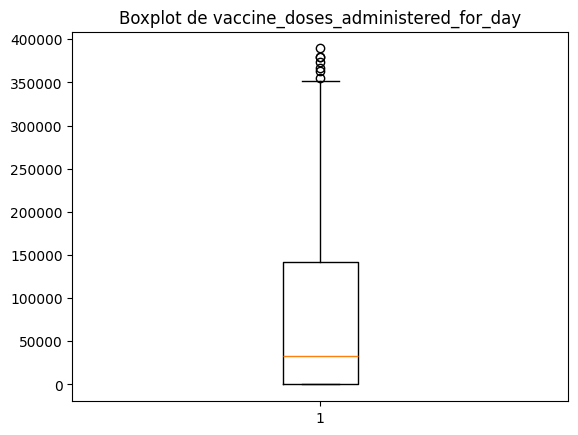

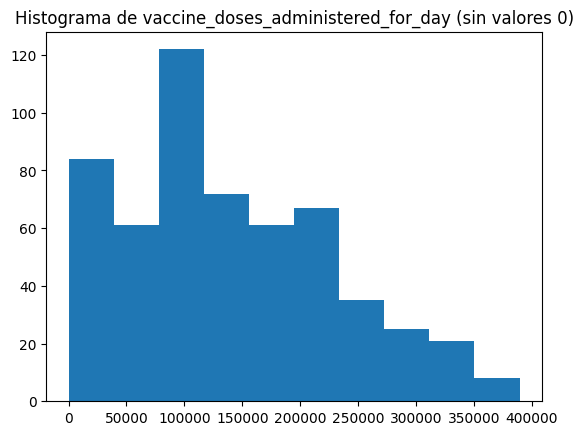

In [59]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style='plain', axis='y')

# Boxplot con matplotlib
plt.boxplot(df_filtered['vaccine_doses_administered_for_day'])
plt.title('Boxplot de vaccine_doses_administered_for_day')
plt.show()

# Filtrar los datos para excluir los valores 0
df_filtered_non_zero = df_filtered[df_filtered['vaccine_doses_administered_for_day'] > 0]

# Histograma con matplotlib
plt.hist(df_filtered_non_zero['vaccine_doses_administered_for_day'], bins=10)  # el número de bins se puede ajustar a preferencia
plt.title('Histograma de vaccine_doses_administered_for_day (sin valores 0)')
plt.show()

In [60]:
avg_vaccine = round(df_pe['vaccine_doses_administered_for_day'].mean(), 0)

df_prueba = df_pe.copy()  # Crear una copia del DataFrame original

# Reemplazar los valores por encima del valor máximo o por debajo del valor mínimo con el promedio
df_prueba['vaccine_doses_administered_for_day'] = df_prueba['vaccine_doses_administered_for_day'].apply(
    lambda x: avg_vaccine if x > upper_bound or x < lower_bound else x
)


In [61]:
df_prueba.to_csv('data\processed\covid19_Peru.csv', index=False)


In [62]:
df_prueba.describe()

,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,population_female,population_density,human_development_index,population_age_00_09,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
count,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,...,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00
mean,4233.86,221.98,80291.42,29381884.00,23351630.68,14450757.00,14931127.00,25.76,0.75,5140624.00,...,25.08,71.03,10554712.00,1256339.00,16425.00,76.52,146.37,84.82,63.90,12.60
std,6686.98,249.86,96308.76,0.00,30152080.34,0.00,0.00,0.00,0.00,0.00,...,2.11,8.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,29381884.00,0.00,14450757.00,14931127.00,25.76,0.75,5140624.00,...,17.44,41.59,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
25%,904.75,29.00,0.00,29381884.00,0.00,14450757.00,14931127.00,25.76,0.75,5140624.00,...,23.56,66.04,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
50%,2118.50,101.50,37411.00,29381884.00,1927555.00,14450757.00,14931127.00,25.76,0.75,5140624.00,...,24.90,71.28,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
75%,5669.25,434.75,140570.25,29381884.00,51074441.25,14450757.00,14931127.00,25.76,0.75,5140624.00,...,26.50,76.55,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
max,58128.00,847.00,389234.00,29381884.00,83274069.00,14450757.00,14931127.00,25.76,0.75,5140624.00,...,32.00,94.82,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
